**0 - Fake news**


---


**1 - Real news**

https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=True.csv

In [ ]:
!pip install pandas 
!pip install numpy
!pip install sklearn
!pip install db-sqlite3
!pip install flask
!pip install flask-ngrok
!curl -s https://ngrok-agent.s3.amazonaws.com/ngrok.asc | sudo tee /etc/apt/trusted.gpg.d/ngrok.asc >/dev/null && echo "deb https://ngrok-agent.s3.amazonaws.com buster main" | sudo tee /etc/apt/sources.list.d/ngrok.list && sudo apt update && sudo apt install ngrok
!pip install pyngrok
!ngrok authtoken 27PjNjWcpRd2ZLo5pUzl9bo7DQv_DrReHKPxzyUqa6rqNSXm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 171 kB 8.9 MB/s 
  Created wheel for db-sqlite3: filename=db_sqlite3-0.0.1-py3-none-any.whl size=1794 sha256=c8fa0b213c58245d70b1073ffd409b1597421dff871a75a0f324158c2779ca6d
  Stored in directory: /root/.cache/pip/wheels/02/38/d5/2f54461050571bf5330fee2a37ab1c9b5e7540b0572f1acdab
  Created wheel for db: filename=db-0.1.1-py3-none-any.whl size=3895 sha256=65c182783282e7c8b2c07ab6bf10d958c66f6e49c227a911b04a387f3a16fa34
  Stored in directory: /root/.cache/pip/wheels/8e/97/82/741d2b360507411ec233d0280d7371faa94b03bde834e4a9be
  Created wheel for antiorm: filename=antiorm-1.2.1-py3-none-any.whl size=31679 sha256=3726410f7ed6220be8a281f04f38783f1b6af109738a5c9aa287ec3622133466
  Stored in directory: /root/.cache/pip/wheels/c5/43/70/e9729370cfff40c49d3e3d05377d54b3ecd71f64e62341ea80
Successfully built db-sqlite3 db antiorm
Looking in indexes: https://pypi

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer #requency–inverse document frequency
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier 
import re #Regular Expression specifies a set of strings that matches it
import string
import csv

import codecs
with codecs.open("/content/drive/MyDrive/FNDS/Fake.csv", 'r', encoding='utf-8',
                 errors='ignore') as fdata:
                 df_fake = pd.read_csv(fdata,encoding='utf8')
with codecs.open("/content/drive/MyDrive/FNDS/Fake.csv", 'r', encoding='utf-8',
                 errors='ignore') as tdata:
                 df_true = pd.read_csv(tdata,encoding='utf8')

#Inserting a column called "class" for fake and real news dataset to categories fake and true news.
df_fake["class"] = 0
df_true["class"] = 1

#testing the last 100 rows of data for machine learning detection
df_fake_manual_testing = df_fake.tail(100)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(100)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

#Merging the main fake and true dataframe
df_marge = pd.concat([df_fake, df_true], axis =0 )
df_marge.head(10)
df = df_marge.drop(["title", "subject","date"], axis = 1)
df = df.sample(frac = 1)
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

#Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.
def wordopt(text):
    text=str(text)
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

df["text"] = df["text"].apply(wordopt)
x = df["text"]
y = df["class"]
#Splitting the dataset into training set and testing set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.95)

#Convert text to vectors
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
#Logistic Regression MODEL
LR = LogisticRegression()
LR.fit(xv_train,y_train)
pred_lr=LR.predict(xv_test)
print('\n\n LR Accuracy',LR.score(xv_test, y_test)*100,'%')

#Decision Tree Classification
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
pred_dt = DT.predict(xv_test)
print('\n DT Accuracy',DT.score(xv_test, y_test)*100,'%')
DT.score(xv_test, y_test)

#Gradient Boosting Classifier
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)
pred_gbc = GBC.predict(xv_test)
print('\n GB Accuracy',GBC.score(xv_test, y_test)*100,'%')

#Random Forest Classifier
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)
pred_rfc = RFC.predict(xv_test)
print('\n RF Accuracy',RFC.score(xv_test, y_test)*100,'%')


print(classification_report(y_test, pred_lr))


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu



 LR Accuracy 47.844538753629664 %

 DT Accuracy 47.585436676345765 %

 GB Accuracy 48.05003350457896 %

 RF Accuracy 47.594371230734865 %
              precision    recall  f1-score   support

           0       0.48      0.57      0.52     22351
           1       0.47      0.39      0.43     22419

    accuracy                           0.48     44770
   macro avg       0.48      0.48      0.47     44770
weighted avg       0.48      0.48      0.47     44770



# Dataset
in vector form


In [ ]:
print(df["text"])
print('\n\n',xv_train)
print('\n\n',xv_test)



---


# Manual Testing of

###**Fake News**

---



#FLASK

*Ngrok is a reverse proxy tool that opens secure tunnels from public URLs to localhost, perfect for exposing local web servers, building webhook integrations, enabling SSH access, testing , demoing from your own machine, and more, and its made even more powerful with native Python integration through pyngrok*

In [ ]:
from flask import Flask, render_template,request,redirect
from pyngrok import ngrok
from flask_ngrok import run_with_ngrok
import os
import sqlite3

def output_lable(prediction):
    if prediction == 0:
        return "Fake News"
    elif prediction == 1:
        return "Real News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    return pred_LR,pred_DT,pred_GBC,pred_RFC
    print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
           output_lable(pred_DT[0]),output_lable(pred_GBC[0]), output_lable(pred_RFC[0])))

app = Flask(__name__,template_folder="/content/drive/MyDrive/FNDS/fnds_webpage")

# Defining the site route
run_with_ngrok(app)

@app.route('/')
def login():
  return render_template("login.html")

@app.route('/login_validation',methods=["POST" ,"GET"])
def login_validation():
  if request.method == 'POST':
    email=request.form.get("em")
    password=request.form.get("pw")
    
    print('Check:',email,password)

    db=sqlite3.connect("/content/drive/MyDrive/FNDS/db/Login.db")

    rows=db.execute("SELECT Email,Password from users WHERE Email='{}' AND Password='{}'".format(email, password))

    rows= rows.fetchall()
    if (len(rows) ==1):
      return render_template("index.html")
    else:
      return redirect("/signup/")

@app.route('/signup/')
def signup():
  return render_template("signup.html")


@app.route("/register", methods=["GET","POST"])
def register():
  if request.method== "POST":

    db=sqlite3.connect("/content/drive/MyDrive/FNDS/db/Login.db")
    data_email= request.form.get("demail")
    data_pass= request.form.get("dpass")

    print('New data:',data_email,data_pass)
    if data_email or data_pass is None:
      query2= "INSERT INTO users VALUES('{}','{}')".format(data_email, data_pass)
      db.execute(query2)
      db.commit()            

      return redirect("/")
    else:
      return redirect("/signup/")

@app.route('/home')
def home():
    return render_template("index.html")

@app.route('/outputt', methods=['POST'])
def predict():  
    if request.method == 'POST':
      message = request.form['news']

      if len(message)<=100:
         ans='Please Enter a Longer & Valid Phrase'
      else:
        pred = manual_testing(message)
        LR=pred[0]
        DT=pred[1]
        GBC=pred[2]
        RFC=pred[3]
        print('LR:',LR[0],'DT:',DT[0],'GBC:',GBC[0],'RFC:',RFC[0])
        if(LR[0]==0 and RFC[0]==0 and DT[0]==0 and GBC[0]==0):
          ans='FAKE NEWS!'
        elif(LR[0]==1 or DT[0]==1 or RFC[0]==1  or GBC[0]==1):
          ans='REAL NEWS'
        elif(LR[0]==1 and RFC[0]==1 or DT[0]==1 and GBC[0]==1):
          ans='FAKE NEWS!'

        else:
          ans='FAKE NEWS!'
        print(ans)
      
      return render_template('output.html', prediction=ans)
    else:
      return render_template('output.html', prediction="Something went wrong!!, please enter a valid input!")
@app.route('/about/')
def about():
  return render_template("aboutUs.html")

@app.route('/aboutSys/')
def aboutSys():
  return render_template("aboutTheSystem.html")

@app.route('/contact/')
def contact():
  return render_template("contactUs.html")
  
@app.route('/changepass/')
def changepass():
  return render_template("changePass.html")
  
if __name__ == '__main__':
  app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://e339-34-125-171-49.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [02/Jun/2022 08:48:05] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [02/Jun/2022 08:48:08] "GET /favicon.ico HTTP/1.1" 404 -


# Visual

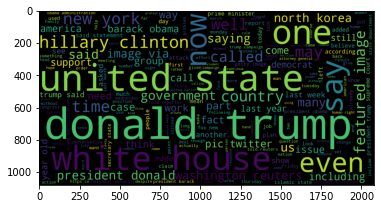

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text=' '.join(df['text'].tolist())
wordcloud=WordCloud(height=1080,width=2080).generate(text)
fig=plt.imshow(wordcloud)

In [ ]:
LR=0
RFC=0
DT=1
GBC=0


if(LR==1 and RFC==1 or DT==1 and GBC==1):
  print('real')
else:
  print('fake')

fake
